# notebook to parse the HBN dx csv into a 1 hot encoding of dx presence/absence

In [115]:
import numpy as np
import pandas as pd
import re
import math

In [105]:
dx_file = '../sourcedata/data/HBN/phenotype/consensusDX_data-2021-06-01T18_41_14.276Z.csv'

In [106]:
dx = pd.read_csv(dx_file,skipfooter=6)
dx.columns = ['id','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11']

<ipython-input-106-bc160a92d3d1>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dx = pd.read_csv(dx_file,skipfooter=6)


In [107]:
dx[10:15]

,id,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
10,"NDARAC904DMU,assessment",No Diagnosis Given,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,"NDARAD123TUZ,assessment",ADHD-Combined Type,Autism Spectrum Disorder,Language Disorder,Separation Anxiety,Specific Phobia,Specific Phobia,Unspecified Intellectual Disability,Provisional Tic Disorder,NaN,NaN,NaN
12,"NDARAD232HVV,assessment",Autism Spectrum Disorder,ADHD-Combined Type,Generalized Anxiety Disorder,Social Anxiety (Social Phobia),Obsessive-Compulsive Disorder,Enuresis,Other Specified Schizophrenia Spectrum and Oth...,NaN,NaN,NaN,NaN
13,"NDARAD481FXF,assessment",Major Depressive Disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,"NDARAD615WLJ,assessment",ADHD-Combined Type,Autism Spectrum Disorder,Specific Phobia,Specific Phobia,Enuresis,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
sub_list = dx.id.tolist()
sub_list = [elem[:12] for elem in sub_list]

## get a list of all possible dx

In [108]:
all_dx = []
for i,column in enumerate(dx):
    if i==0:
        continue
    all_dx.append(dx[column].tolist())
all_dx = [item for sublist in all_dx for item in sublist]
all_dx = np.unique(np.array(all_dx))
all_dx = all_dx[1:-1]
all_dx = all_dx.tolist()
all_dx[0:10]

['ADHD-Combined Type',
 'ADHD-Hyperactive/Impulsive Type',
 'ADHD-Inattentive Type',
 'Acute Stress Disorder',
 'Adjustment Disorders',
 'Agoraphobia',
 'Alcohol Use Disorder',
 'Autism Spectrum Disorder',
 'Avoidant/Restrictive Food Intake Disorder',
 'Binge-Eating Disorder']

In [109]:
all_dx.index('Unspecified Neurodevelopmental Disorder')

78

In [110]:
#subject by dx array
dx_array = np.zeros( (dx.shape[0],len(all_dx) ))

In [122]:
#LOOP THROUGH columns
for i,column in enumerate(dx):
    if i==0:
        continue
    for ii,d in enumerate(dx[column]):
        #print(i,ii,d)
        if not isinstance(d, str):
            if math.isnan(d):
                continue
        if not bool(re.match(d,' ')):
            dx_array[ii,all_dx.index(d)]=1

In [126]:
dx_array

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [133]:
np.save('../sourcedata/data/HBN/phenotype/parsed/dx_list.npy',all_dx)
np.save('../sourcedata/data/HBN/phenotype/parsed/sub_list.npy',sub_list)
np.save('../sourcedata/data/HBN/phenotype/parsed/dx_onehot.npy',dx_array)

In [138]:
dx_df = pd.DataFrame(dx_array)
dx_df.columns = all_dx
dx_df

,ADHD-Combined Type,ADHD-Hyperactive/Impulsive Type,ADHD-Inattentive Type,Acute Stress Disorder,Adjustment Disorders,Agoraphobia,Alcohol Use Disorder,Autism Spectrum Disorder,Avoidant/Restrictive Food Intake Disorder,Binge-Eating Disorder,...,Tobacco Use Disorder,Tourettes Disorder,Trichotillomania (Hair-Pulling Disorder),Unspecified Anxiety Disorder,Unspecified Attention-Deficit/Hyperactivity Disorder,Unspecified Bipolar and Related Disorder,Unspecified Depressive Disorder,Unspecified Intellectual Disability,Unspecified Neurodevelopmental Disorder,Unspecified Tic Disorder
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
dx_df.to_pickle('../sourcedata/data/HBN/phenotype/parsed/dx_onehot_df.pkl')
#unpickled_df = pd.read_pickle("./dummy.pkl")

In [139]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(dx_array)


In [140]:
embedding.shape

(1812, 2)

In [141]:
from matplotlib import pyplot as plt

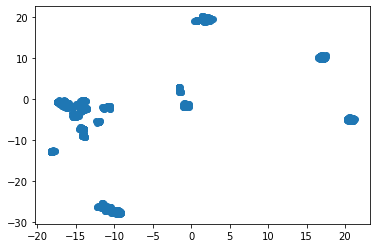

In [143]:
plt.scatter(embedding[:,0],embedding[:,1])